In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.731096,0.793106,6.819521e-07,0.812487,0.712635,-0.014356,0.851807,0.618629,-0.046176,0.869449,...,0.621707,0.507457,-0.250084,0.607742,0.426239,-0.277379,0.604375,0.353735,-0.295183,Xinchao
1,0.691443,0.814634,8.285698e-07,0.776714,0.772886,-0.020571,0.825973,0.685739,-0.042499,0.860848,...,0.624042,0.470777,-0.184043,0.620672,0.391717,-0.209682,0.627392,0.320675,-0.224776,Xinchao
2,0.661949,0.880805,8.134364e-07,0.761577,0.861589,-0.047184,0.830524,0.764692,-0.073388,0.869518,...,0.597814,0.439620,-0.157296,0.597989,0.349732,-0.183976,0.606495,0.261200,-0.199128,Xinchao
3,0.686914,0.992379,9.005355e-07,0.784233,0.963228,-0.045229,0.858352,0.882896,-0.075740,0.909383,...,0.623132,0.514523,-0.138792,0.628623,0.416426,-0.160600,0.639352,0.324696,-0.173644,Xinchao
4,0.673924,0.986890,8.870747e-07,0.767809,0.985796,-0.046274,0.852948,0.952836,-0.078668,0.921797,...,0.642017,0.536832,-0.156083,0.650602,0.447859,-0.178819,0.666359,0.363969,-0.192305,Xinchao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0.246165,0.888583,6.168532e-07,0.340099,0.794292,-0.039111,0.398223,0.661453,-0.055675,0.438089,...,0.034193,0.535416,-0.124378,-0.008920,0.472479,-0.145650,-0.045071,0.410893,-0.159025,Xinchao
666,0.328463,0.883183,5.640335e-07,0.420259,0.797212,-0.036764,0.475401,0.664268,-0.054170,0.512225,...,0.136612,0.522136,-0.139674,0.092796,0.450934,-0.163876,0.055581,0.380093,-0.179177,Xinchao
667,0.424707,0.886702,6.947178e-07,0.505922,0.801277,-0.027731,0.546474,0.664092,-0.041310,0.579067,...,0.241994,0.535308,-0.148849,0.206945,0.460770,-0.174217,0.176287,0.384127,-0.190026,Xinchao
668,0.456626,0.896657,7.109353e-07,0.533791,0.804494,-0.022484,0.566953,0.665041,-0.034256,0.601218,...,0.277372,0.549810,-0.152782,0.245987,0.474279,-0.177434,0.218958,0.393773,-0.192994,Xinchao


In [33]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.731096,0.793106,6.819521e-07,0.812487,0.712635,-0.014356,0.851807,0.618629,-0.046176,0.869449,...,0.621707,0.507457,-0.250084,0.607742,0.426239,-0.277379,0.604375,0.353735,-0.295183,Xinchao
1,0.691443,0.814634,8.285698e-07,0.776714,0.772886,-0.020571,0.825973,0.685739,-0.042499,0.860848,...,0.624042,0.470777,-0.184043,0.620672,0.391717,-0.209682,0.627392,0.320675,-0.224776,Xinchao
2,0.661949,0.880805,8.134364e-07,0.761577,0.861589,-0.047184,0.830524,0.764692,-0.073388,0.869518,...,0.597814,0.439620,-0.157296,0.597989,0.349732,-0.183976,0.606495,0.261200,-0.199128,Xinchao
3,0.686914,0.992379,9.005355e-07,0.784233,0.963228,-0.045229,0.858352,0.882896,-0.075740,0.909383,...,0.623132,0.514523,-0.138792,0.628623,0.416426,-0.160600,0.639352,0.324696,-0.173644,Xinchao
4,0.673924,0.986890,8.870747e-07,0.767809,0.985796,-0.046274,0.852948,0.952836,-0.078668,0.921797,...,0.642017,0.536832,-0.156083,0.650602,0.447859,-0.178819,0.666359,0.363969,-0.192305,Xinchao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,0.246165,0.888583,6.168532e-07,0.340099,0.794292,-0.039111,0.398223,0.661453,-0.055675,0.438089,...,0.034193,0.535416,-0.124378,-0.008920,0.472479,-0.145650,-0.045071,0.410893,-0.159025,Xinchao
666,0.328463,0.883183,5.640335e-07,0.420259,0.797212,-0.036764,0.475401,0.664268,-0.054170,0.512225,...,0.136612,0.522136,-0.139674,0.092796,0.450934,-0.163876,0.055581,0.380093,-0.179177,Xinchao
667,0.424707,0.886702,6.947178e-07,0.505922,0.801277,-0.027731,0.546474,0.664092,-0.041310,0.579067,...,0.241994,0.535308,-0.148849,0.206945,0.460770,-0.174217,0.176287,0.384127,-0.190026,Xinchao
668,0.456626,0.896657,7.109353e-07,0.533791,0.804494,-0.022484,0.566953,0.665041,-0.034256,0.601218,...,0.277372,0.549810,-0.152782,0.245987,0.474279,-0.177434,0.218958,0.393773,-0.192994,Xinchao


In [34]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (670, 63)
Labels shape = (670,)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [36]:
y_pred = svm.predict(x_test)
y_pred

array(['toi', 'Xinchao', 'Xinchao', 'toi', 'Xinchao', 'Xinchao', 'toi',
       'homnay', 'Xinchao', 'hom nay', 'toi', 'Xinchao', 'hom nay', 'toi',
       'toi', 'Xinchao', 'toi', 'Xinchao', 'toi', 'Xinchao', 'homnay',
       'Xinchao', 'toi', 'hom nay', 'hom nay', 'Xinchao', 'Xinchao',
       'hom nay', 'hom nay', 'homnay', 'hom nay', 'Xinchao', 'toi', 'toi',
       'Xinchao', 'toi', 'Xinchao', 'hom nay', 'toi', 'hom nay', 'toi',
       'Xinchao', 'Xinchao', 'Xinchao', 'Xinchao', 'homnay', 'Xinchao',
       'Xinchao', 'Xinchao', 'Xinchao', 'Xinchao', 'toi', 'Xinchao',
       'toi', 'Xinchao', 'homnay', 'toi', 'toi', 'Xinchao', 'toi', 'toi',
       'hom nay', 'Xinchao', 'toi', 'Xinchao', 'homnay', 'toi', 'homnay',
       'Xinchao', 'toi', 'Xinchao', 'homnay', 'toi', 'Xinchao', 'Xinchao',
       'Xinchao', 'toi', 'Xinchao', 'Xinchao', 'Xinchao', 'Xinchao',
       'toi', 'toi', 'Xinchao', 'toi', 'toi', 'toi', 'hom nay', 'Xinchao',
       'Xinchao', 'Xinchao', 'toi', 'Xinchao', 'Xinchao', 

In [37]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.8656716417910447, 0.8656716417910447, 0.8656716417910447)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

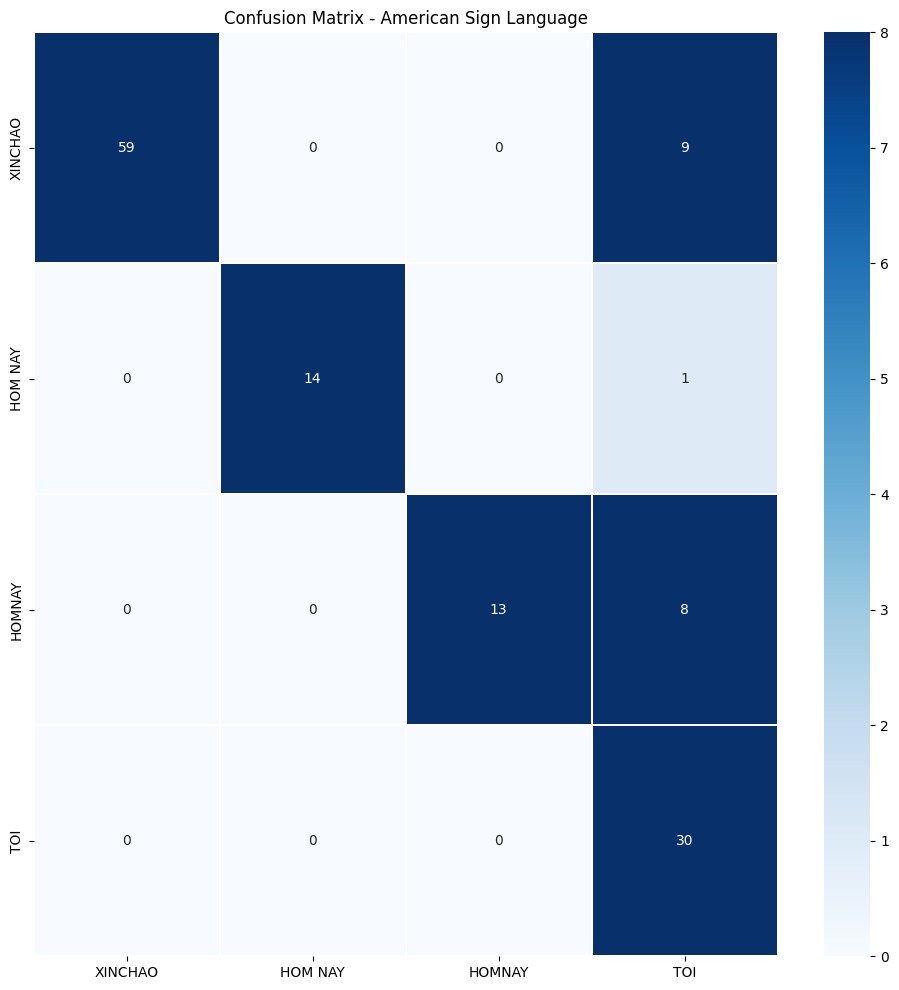

In [38]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [39]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)